## Emre Reyhanlıoğlu
## 150140126
## Assignment 3

In [36]:
from matplotlib import pyplot as plt
import pandas as pd
import math

# Part 1 
## a) Random Number Generation:



In [2]:
# In this part, I used Linear Congruential Generator to genere random numbers
# Reference for LCG coefficients is below
#http://www.ams.org/journals/mcom/1999-68-225/S0025-5718-99-00996-5/S0025-5718-99-00996-5.pdf

class Random:
    a = 741103597
    c = 0
    m = 2**32
    
    def seed(self, s):
        Random.rand = s
        
    def nextDouble(self):
        Random.rand = (Random.a * Random.rand + Random.c) % Random.m
        return Random.rand / Random.m 
    def nextInt(self, upperBound):
        Random.rand = (Random.a * Random.rand + Random.c) % Random.m
        return (int)((Random.rand / Random.m)*upperBound)
    def uniform(self, lowerBound, upperBound):
        Random.rand = (Random.a * Random.rand + Random.c) % Random.m
        return (Random.rand / Random.m)*(upperBound-lowerBound)+lowerBound
    

## First Test (generating 5k random number)

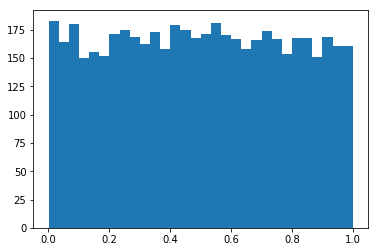

In [3]:
random = Random()
random.seed(1234)
randomList = []
for i in range(5000):
    randomList.append(random.nextDouble())

plt.hist(randomList,bins=30);

## Second Test (generating 500k random number)

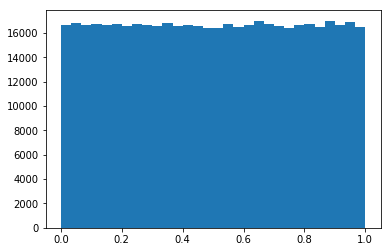

In [4]:
random.seed(5678)
randomList.clear()
for i in range(500000):
    randomList.append(random.nextDouble())
plt.hist(randomList,bins=30);

## Replacing any random number generator from previous assignment with mine
### My edited simulation class
I writed #EDITED at the end of edited lines

In [5]:
#DEFINING CONSTANT VALUES FOR THE SIMULATION
    
ROOM_CAPACITY = 40

CGRT_MIN = 7    #Cabbages goes rotten time -> minimum value for uniform distribution 
CGRT_MAX = 12   #Cabbages goes rotten time -> maximum value for uniform distribution 

CAAT_MIN = 1     #Cabbage arrival time-> minimum value 
CAAT_MAX = 15    #Cabbage arrival time-> maximum value 

CUAT_MIN = 0     #Customer arrival time-> minimum value
CUAT_MAX = 3     #Customer arrival time-> maximum value

class Event:
    def __init__(self, name, time, cabbageID):
        self.name = name
        self.time = time
        self.cabbageID = cabbageID
         

class CabbageShop:    
    
    #Constructor
    def __init__(self, numberOfCustomers, initialNumberOfCabbages):
        self.numberOfCustomers = numberOfCustomers
        self.numberOfCabbages = initialNumberOfCabbages
        self.cabbageID = 0
        self.numberOfCabbagesInTime = []
        self.roomCapacity = ROOM_CAPACITY
        self.rottenCabbages = 0
        self.happyCustomer = 0
        self.unhappyCustomer = 0
        self.roomCapacityExceeded = 0
        self.cabbagesInStock = [] 
        self.eventList = []        
        
        for i in range(0, initialNumberOfCabbages):
            self.cabbageID += 1
            self.eventList.append(Event("cabbage expires", random.uniform(CGRT_MIN,CGRT_MAX), self.cabbageID)) #EDITED
            self.cabbagesInStock.append(self.cabbageID)
            self.sortEventsByTime()
        self.numberOfCabbagesInTime.append((0, self.numberOfCabbages)) 
    
    #Destructor
    def __del__(self):
        self.numberOfCabbagesInTime.clear()
        self.eventList.clear()
        self.cabbagesInStock.clear()
    
    
    def sellOneCabbagePickedRandomly(self):
        randomIndex = 0
        if(len(self.cabbagesInStock)>1):
            randomIndex = random.nextInt(len(self.cabbagesInStock)) #EDITED
            
        removedID = self.cabbagesInStock[randomIndex]
        self.cabbagesInStock.pop(randomIndex)
        
        eventIndex = -1
        for i in range(0, len(self.eventList)):
            if(self.eventList[i].cabbageID == removedID):
                eventIndex = i
                break
        if(eventIndex > -1):
            self.eventList.pop(eventIndex)
            self.sortEventsByTime()
        else:
            print("UNEXPECTED ERROR OCCURED")
    
    
    def sortEventsByTime(self):
        self.eventList = sorted(self.eventList, key=lambda Event: Event.time)  
                     
    
    def handleEvents(self, event):
        if(event.name == "customer arriving/shopping/leaving"):
            if(self.numberOfCabbages>0):
                #Sell a cabbage
                self.sellOneCabbagePickedRandomly()
                self.happyCustomer += 1
                self.numberOfCabbages -= 1
                self.numberOfCabbagesInTime.append((event.time, self.numberOfCabbages))
                
                #Reorder a cabbage
                self.eventList.append(Event("cabbage arrives",event.time+random.uniform(CAAT_MIN,CAAT_MAX),-1)) #EDITED
                self.sortEventsByTime()
                
            else:
                self.unhappyCustomer += 1
            
            #Add next customer event to the list   
            self.eventList.append(Event("customer arriving/shopping/leaving", event.time+random.uniform(CUAT_MIN,CUAT_MAX),-1)) #EDITED
            self.sortEventsByTime()
            
        elif(event.name == "cabbage expires"):
            removingIndex = self.cabbagesInStock.index(event.cabbageID)
            self.cabbagesInStock.pop(removingIndex)
            self.numberOfCabbages -=1
            self.rottenCabbages += 1
            self.numberOfCabbagesInTime.append((event.time, self.numberOfCabbages))
            
            #Reorder a cabbage
            self.eventList.append(Event("cabbage arrives",event.time+random.uniform(CAAT_MIN,CAAT_MAX),-1)) #EDITED
            self.sortEventsByTime()   
           
            
        elif(event.name == "cabbage arrives"):
            if(len(self.cabbagesInStock) < ROOM_CAPACITY):
                self.cabbageID += 1
                self.cabbagesInStock.append(self.cabbageID)
                self.numberOfCabbages += 1
                self.eventList.append(Event("cabbage expires",event.time+random.uniform(CGRT_MIN,CGRT_MAX), self.cabbageID)) #EDITED
                self.sortEventsByTime()
                self.numberOfCabbagesInTime.append((event.time, self.numberOfCabbages))
            else:
                self.roomCapacityExceeded += 1
               
    
    #This method simulates all of the events and returns results array
    def simulate(self):
        self.eventList.append(Event("customer arriving/shopping/leaving",random.uniform(CUAT_MIN,CUAT_MAX),-1)) #EDITED
        self.sortEventsByTime()
        while(self.happyCustomer+self.unhappyCustomer < self.numberOfCustomers):
            self.handleEvents(self.eventList[0])
            self.eventList.pop(0)
            self.sortEventsByTime()
        
        
        resultList = []
        resultList.append(self.numberOfCabbages)
        resultList.append(self.happyCustomer)
        resultList.append(self.unhappyCustomer)
        resultList.append(self.rottenCabbages)
        resultList.append(self.roomCapacityExceeded)
        return resultList
    
    
     #This method prints the graph that shows changes in number of cabbages for events
    def printGraph(self):
        print("Number of remaining cabbages =",self.numberOfCabbages)
        print("Number of happy customers =",self.happyCustomer)
        print("Number of unhappy customers =",self.unhappyCustomer)
        print("Number of rotten cabbages =",self.rottenCabbages)
        print("Capacity exceeded =",self.roomCapacityExceeded)
        
        timeValues, cabbageValues = zip(*self.numberOfCabbagesInTime)
        plt.plot(timeValues, cabbageValues)
        plt.title('SIMULATION GRAPH')
        plt.xlabel('Days')
        plt.ylabel('Number of Cabbages in Stock')
        plt.show()

## Testing my new simulation class

Number of remaining cabbages = 4
Number of happy customers = 970
Number of unhappy customers = 30
Number of rotten cabbages = 221
Capacity exceeded = 0


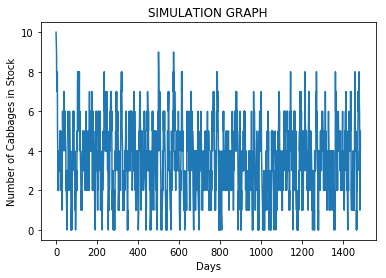

In [6]:
cabbageShop = CabbageShop(numberOfCustomers=1000, initialNumberOfCabbages=10)
cabbageShop.simulate()
cabbageShop.printGraph()

### Comment: It is working like my old simulation, my random number generator is not bad

#  
# Part 2 - Input Modelling

### 2.a) Examining the supplied data about customer arrival time and splittingt the file into analysis and validation sets


In [7]:
# Reading the file
customerArrival= pd.read_csv("customer_arrivals.csv",header=None)
print(customerArrival.shape)
customerArrival.head()

(1000, 1)


,0
0,1.88
1,10.37
2,14.31
3,14.96
4,16.67


In [8]:
from sklearn.model_selection import train_test_split
arrival_test, arrival_val= train_test_split(customerArrival, test_size = 0.30)
print(arrival_test.shape)
print(arrival_val.shape)

(700, 1)
(300, 1)


## 2.b) Visualisations of the analysis data

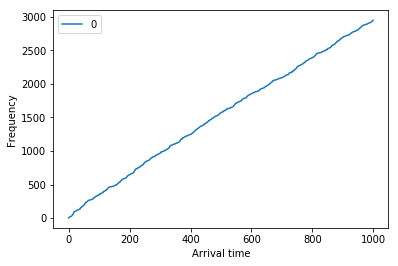

In [9]:
arrival_test.sort_values(by=0).plot.line();
plt.xlabel('Arrival time');
plt.ylabel('Frequency');
plt.show()

###  
### Calculating interarrival times and adding them into an array

In [10]:
arrivalTestValues = arrival_test.sort_values(by=0).values
size = arrivalTestValues.shape[0]

interArrivalTimes = []

for i in range(size-2):
    interArrivalTimes.append(arrivalTestValues[i+1][0] - arrivalTestValues[i][0])


### Plotting histogram of interarrival times

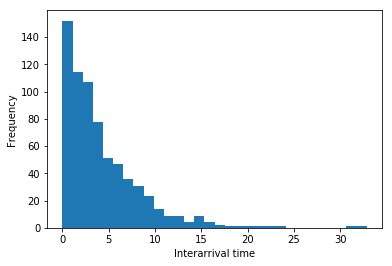

In [11]:
plt.hist(interArrivalTimes,bins=30);
plt.xlabel('Interarrival time');
plt.ylabel('Frequency');
plt.show()

## 2.c) Choosing an appropriate probability distribution
###  Histogram of interarrival times looks like an exponential distribution, so that I will use Maximum Likelihood principle to fit this exponential distribution

## 2.d) Calculating the parameters 

### I need to find lambda parameter which is (1/average)

In [12]:
sumOfInterarrivals = 0
for i in range(len(interArrivalTimes)):
    sumOfInterarrivals += interArrivalTimes[i]

average = sumOfInterarrivals/len(interArrivalTimes)
lambdaParam = 1/average

In [13]:
lambdaParam

0.23723986037516528

### I found lambda, now I need to write Inverse Transform Method then I can use it for my exponentially distributed random number generator

In [14]:
def inverseExponentialCdf(lambdaP,F):
    return -math.log(1-F)/lambdaP

### After that, I can write exponentially distributed random number generator
#### I used my random number generator(from the first part) to calculate F value

In [15]:
def expovariate(lambdaparameter):
    F = random.nextDouble()
    x = inverseExponentialCdf(lambdaparameter,F)
    return x

In [16]:
testArray = []
for i in range(10):
    testArray.append(expovariate(lambdaParam))
testArray

[2.088017284954903,
 0.7815506638602766,
 1.18863158225245,
 1.1822003594004404,
 0.5618128218213131,
 4.206900049715527,
 2.013192872444414,
 4.4977344514753295,
 3.658125483231181,
 9.840226880699262]

## 2.e) Generating some random numbers from my exponentially distributed number generator

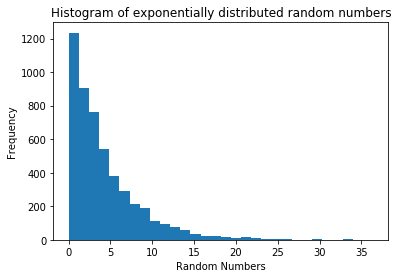

In [17]:
randomExpNumbers = [expovariate(lambdaParam) for i in range(5000)]
plt.hist(randomExpNumbers,bins=30)
plt.title('Histogram of exponentially distributed random numbers')
plt.xlabel('Random Numbers')
plt.ylabel('Frequency')
plt.show()

#  
# Part 3 - Input Validation
### Calculating actual inter arrival times by using validation set

In [18]:

arrivalValidationValues = arrival_val.sort_values(by=0).values
sizeVal = arrival_val.shape[0]


interarrivalExpected = []
for i in range(sizeVal-1):
    interarrivalExpected.append(expovariate(lambdaParam))


interarrivalValidation = []

for i in range(sizeVal-1):
    interarrivalValidation.append(arrivalValidationValues[i+1][0]-arrivalValidationValues[i][0])


### Plotting the histogram of actual interarrival times data

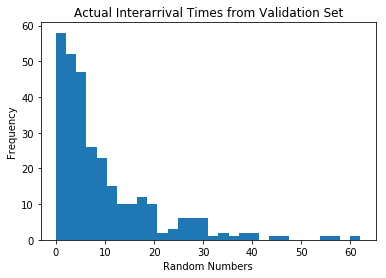

In [19]:
plt.hist(interarrivalValidation,bins=30)
plt.title('Actual Interarrival Times from Validation Set')
plt.xlabel('Random Numbers')
plt.ylabel('Frequency')
plt.show()


### I need to use difference function to see how extremely different any data is from the expected
$\hat I=\sum_i{(O_i-E_i)^2}$

In [20]:
def diff(observed,expected):
    assert len(expected)==len(observed)
    diffsum = 0.0
    for i in range(len(expected)):
        thisdiff = (observed[i]-expected[i])**2  #/expected[i]
        diffsum += thisdiff
    return diffsum

In [21]:
len(interarrivalExpected)
actualdiff=diff(interarrivalValidation,interarrivalExpected)
actualdiff

45499.19590514479

### This value is very high interestingly

### Now, I need to sample from the model to see what normal values would look like in order to see if that is extreme or not

In [22]:
def sample_from_model():
    sampleArray = []
    for i in range(len(interarrivalValidation)):
        sampleArray.append(expovariate(lambdaParam))
    sampleArray.sort()
    return sampleArray

In [23]:
sample_from_model()

[0.010933847856344915,
 0.027441063046591753,
 0.02891978744251193,
 0.030007153036052052,
 0.032787191493213685,
 0.03639254600293693,
 0.05650417537659398,
 0.07879138510182013,
 0.11973786349658848,
 0.13056364215441413,
 0.17286071935034364,
 0.19625420958531378,
 0.22125064918746962,
 0.22861520315717668,
 0.2303964671954247,
 0.23197331472497165,
 0.233573615108403,
 0.2773096954671358,
 0.2948985346107973,
 0.30372806778387623,
 0.3042326527327737,
 0.3108002783680854,
 0.32518710772980297,
 0.3263072236571222,
 0.34119979546211476,
 0.36018616719229624,
 0.3657895606650027,
 0.39226135772043247,
 0.42016591748304455,
 0.42817293035441467,
 0.4360060808238379,
 0.43788458403799424,
 0.4452858594885067,
 0.4592242297041208,
 0.471587738973429,
 0.504172647162964,
 0.5479990034617936,
 0.5614849817862202,
 0.5678967368087117,
 0.6104619639805208,
 0.6112127116813328,
 0.6327262062916892,
 0.6356640320774255,
 0.6424348516284025,
 0.6449328772765419,
 0.6571434442798549,
 0.6642626

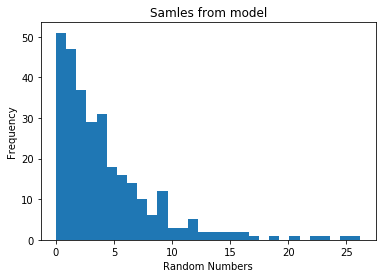

In [24]:
plt.hist(sample_from_model(),bins=30)
plt.title('Samles from model')
plt.xlabel('Random Numbers')
plt.ylabel('Frequency')
plt.show()

In [25]:
def sample_difference_value():
    sample = sample_from_model()
    d = diff(sample,interarrivalExpected)
    return d

In [26]:
sample_difference_value()

8527.582340063085

In [27]:
sample_differences = [sample_difference_value() for i in range(1000)]

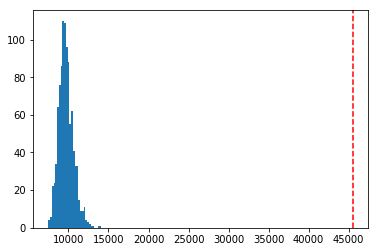

In [28]:
_=plt.hist(sample_differences,bins=30)
_=plt.axvline(actualdiff,color='r',linestyle='dashed')

In [29]:
sample_differences_more_than_actual = [s for s in sample_differences if s>actualdiff]
num_sample_differences_more_than_actual=len(sample_differences_more_than_actual)
p=num_sample_differences_more_than_actual/len(sample_differences)
p

0.0

### Comments: In this part, I tried to follow the example in the course files but I am not sure which part is wrong. I think my expected data is wrong. According to the results, I should reject the null hypothesis with this value, but histograms were similar.

### Now, I will try with chi square function

In [30]:
from scipy.stats import chisquare

chisquare(interarrivalExpected, interarrivalValidation)


Power_divergenceResult(statistic=6218.373388539836, pvalue=0.0)

# Part 4 - Input/Output Validation

In [31]:
# Reading the file
experiments= pd.read_csv("experiments.csv",header=None)
print(customerArrival.shape)
customerArrival.head()

(1000, 1)


,0
0,1.88
1,10.37
2,14.31
3,14.96
4,16.67


In [32]:
# cabbageShop.simulate() returns results array and it contains values below;
# results[1] <- happy customer  
# results[2] <- unhappy customer
# results[3] <- rotten cabbages


happyCustomers = []
unhappyCustomers = []
rottenCabbages = []

valHappyCustomers = []
valUnhappyCustomers = []
valRottenCabbages = []

for i in range(1,experiments.shape[0]):
    cabbageShop = CabbageShop(1000, int(experiments.values[i][1]))
    results = cabbageShop.simulate()
    happyCustomers.append(results[1])
    unhappyCustomers.append(results[2])
    rottenCabbages.append(results[3])
    valHappyCustomers.append(int(experiments.values[i][2]))
    valUnhappyCustomers.append(int(experiments.values[i][3]))
    valRottenCabbages.append(int(experiments.values[i][4]))
    


print('Simulation Happy Customers ',happyCustomers)
print('Validation Happy Customers',valHappyCustomers)

print('Simulation Unhappy Customers ',unhappyCustomers)
print('Validation Unhappy Customers',valUnhappyCustomers)

print('Simulation Rotten Cabbages ',rottenCabbages)
print('Validation Rotten Cabbages',valRottenCabbages)



Simulation Happy Customers  [933, 973, 976]
Validation Happy Customers [968, 993, 991]
Simulation Unhappy Customers  [67, 27, 24]
Validation Unhappy Customers [32, 7, 9]
Simulation Rotten Cabbages  [104, 169, 227]
Validation Rotten Cabbages [606, 706, 952]


### My outputs are different than experiments

# Part 5 - Experimentation results
### Lets plot the results

### Number of happy customers:

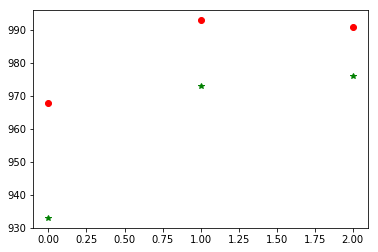

In [33]:
plt.plot(happyCustomers,'g*', valHappyCustomers, 'ro')
plt.show()

### Green stars are number of happy customers from my simulation and red points are experiment results of it
##   
### Number of unhappy customers:

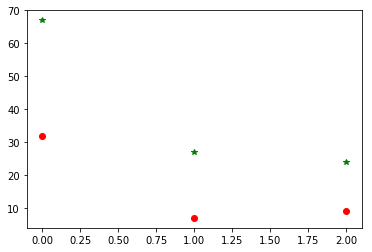

In [34]:
plt.plot(unhappyCustomers,'g*', valUnhappyCustomers, 'ro')
plt.show()

### Green stars are number of unhappy customers from my simulation and red points are experiment results of it
##  
### Number of rotten cabbages:

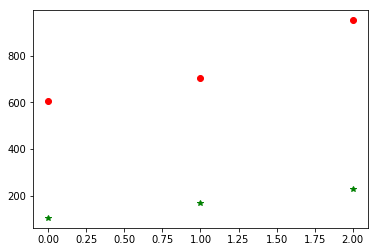

In [35]:
plt.plot(rottenCabbages,'g*', valRottenCabbages, 'ro')
plt.show()

### Green stars are number of cabbages from my simulation and red points are experiment results of it